In [8]:
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt 
import numpy as np

sys.path.append(os.path.join(os.getcwd(), '..'))

from aye.preprocessing import *
import cv2

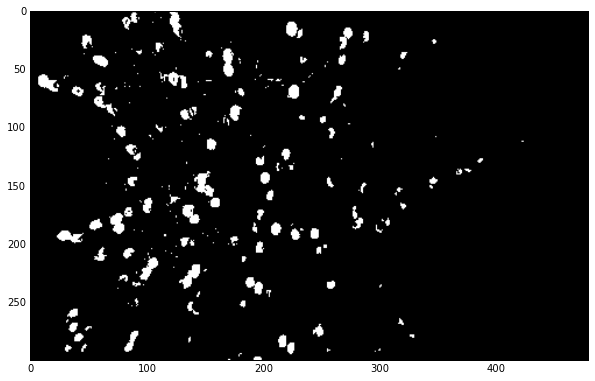

In [19]:
fig = plt.figure(figsize=(10,10))
im_bw = cv2.imread('../data/frame0006_bw.png', cv2.IMREAD_GRAYSCALE)
im_pos = cv2.imread('../data/frame0000_positive.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(im_bw, cmap=plt.cm.gray)

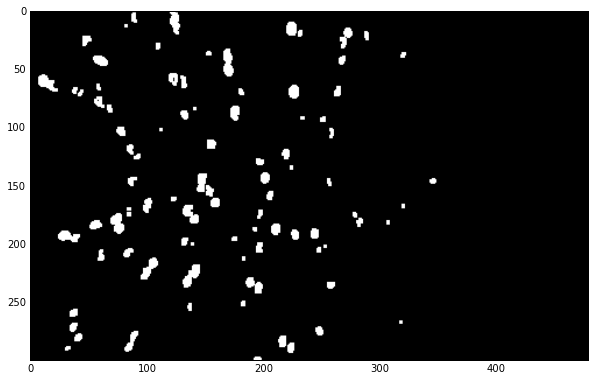

In [21]:
fig = plt.figure(figsize=(10,10))

n = 3
kernel = np.ones((n, n), np.uint8)
opened = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, kernel)

plt.imshow(opened, cmap=plt.cm.gray)

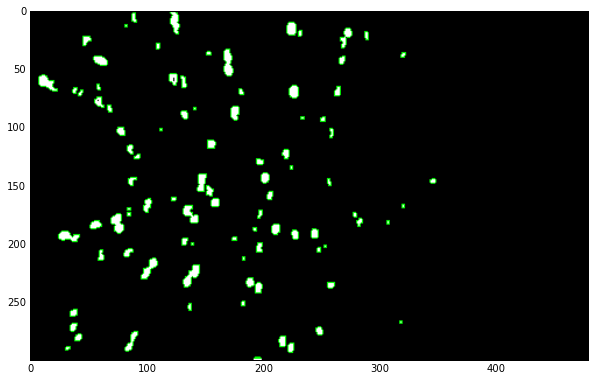

In [42]:
# Find contours
bw = np.array(opened, dtype=np.uint8, copy=True)

# We use EXTERNAL, because we want to fill all the holes
cs, _ = cv2.findContours(bw, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours to visualize it
color = cv2.cvtColor(bw, cv2.COLOR_GRAY2RGB)
cv2.drawContours(color, cs, -1, (0,255,0), 1)
fig = plt.figure(figsize=(10,10))
plt.imshow(color)

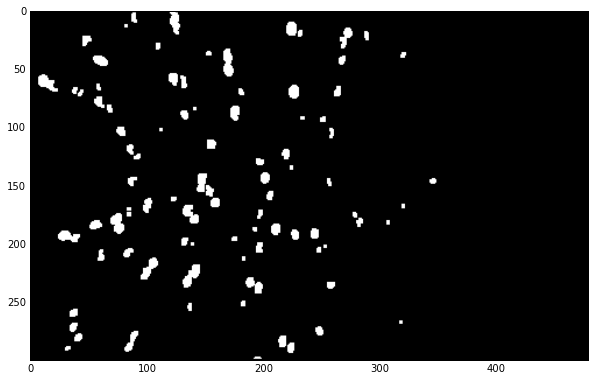

In [47]:
# Now we redraw the contour on a grayscale image to have the filled version
# Notice all holes are filed
filled = np.zeros_like(bw)
cv2.drawContours(filled, cs, -1, color=255, thickness=-1)
filled_mask = (filled == 255)
fig = plt.figure(figsize=(10,10))
plt.imshow(filled, cmap=plt.cm.gray)

In [49]:
# filled_area: number of pixels filled
filled_area = np.sum(filled_mask)
print('filled area: {0}'.format(filled_area))

filled area: 4357


In [ ]:
# pixel